In [36]:
import pandas as pd

df_train = pd.read_csv('X_train_Hi5.csv', nrows=100000)
df_test = pd.read_csv('X_test_Hi5.csv', nrows=100000)

In [37]:
value_counts = df_train['piezo_groundwater_level_category'].dropna().value_counts()

print("Répartition des valeurs :")
print(value_counts)

Répartition des valeurs :
piezo_groundwater_level_category
High         26878
Very High    24003
Average      23138
Low          16111
Very Low      9870
Name: count, dtype: int64


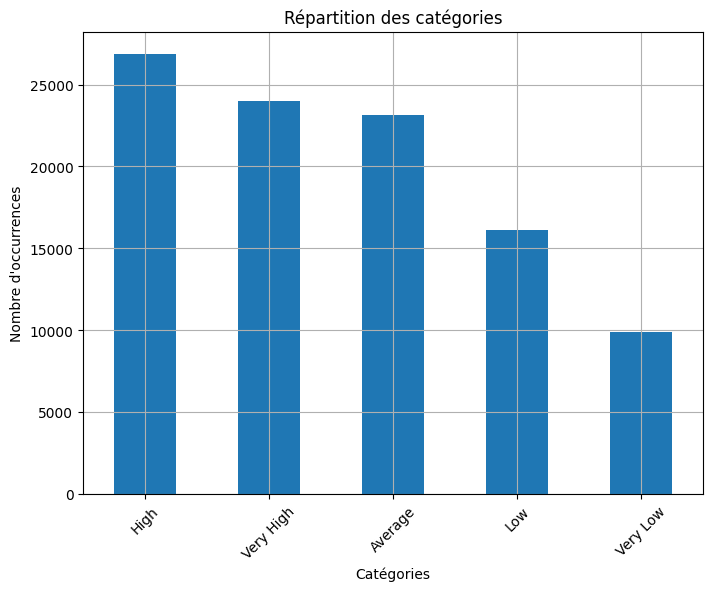

In [38]:
import matplotlib.pyplot as plt

value_counts.plot(kind='bar', figsize=(8, 6))
plt.title("Répartition des catégories")
plt.xlabel("Catégories")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
%pip install geopandas

In [39]:
import geopandas as gpd
from shapely.geometry import Point

df_train['correct_longitude'] = df_train['meteo_latitude']  # Inversion
df_train['correct_latitude'] = df_train['meteo_longitude']  # Inversion

# Créer une colonne de géométrie avec shapely
geometry = [Point(xy) for xy in zip(df_train['correct_longitude'], df_train['correct_latitude'])]
gdf = gpd.GeoDataFrame(df_train, geometry=geometry, crs="EPSG:4326")

In [40]:
gdf

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category,correct_longitude,correct_latitude,geometry
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,1.793055e+09,11.8,992.0,25250,2.9,16.2,High,5.688000,45.769333,POINT (5.688 45.76933)
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High,5.329333,45.976500,POINT (5.32933 45.9765)
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,3.810492e+08,0,8085.0,24890,8.4,7.8,High,5.106667,45.833000,POINT (5.10667 45.833)
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High,5.843000,46.302833,POINT (5.843 46.30283)
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low,5.287667,46.204333,POINT (5.28767 46.20433)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,105166,32,Fri Jun 28 07:31:38 CEST 2024,5.00,Gers,32398,SAINT-MONT - 32,['948AA03'],96.00,09793X0003/F,...,4.333680e+07,0.9,308.0,21560,47.7,0,Very Low,-0.096667,43.604667,POINT (-0.09667 43.60467)
99996,105167,32,Fri Jun 28 07:31:38 CEST 2024,12.30,Gers,32127,Puits de las Cabanas (Estang-32),['312AA05'],130.00,09523X0034/F,...,2.996826e+07,1.3,666.0,19810,28.2,1.3,High,-0.045000,43.993500,POINT (-0.045 43.9935)
99997,105168,32,Fri Jun 28 07:31:38 CEST 2024,253.00,Gers,32156,près de Flourette,['334AC05'],178.00,10072X0026/F,...,2.580803e+07,2.3,215.0,22540,3.8,12.1,Average,0.400833,43.530167,POINT (0.40083 43.53017)
99998,105169,32,Fri Jun 28 07:31:38 CEST 2024,781.50,Gers,32115,A Seignebon,['334AC05'],155.00,09536X0008/F,...,1.601369e+07,48.1,322.0,20690,25.9,0,Average,0.222000,43.616667,POINT (0.222 43.61667)


In [ ]:
%pip install cartopy 

Note: you may need to restart the kernel to use updated packages.


c:\Users\alexi\anaconda3\lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\alexi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\alexi\anaconda3\lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [42]:
print(gdf.crs) # WGS 84 (latitude/longitude)

EPSG:4326


In [44]:
print("Longitude range:", gdf['correct_longitude'].min(), gdf['correct_longitude'].max())
print("Latitude range:", gdf['correct_latitude'].min(), gdf['correct_latitude'].max())

Longitude range: -4.664167 8.1455
Latitude range: 42.384667 50.833833


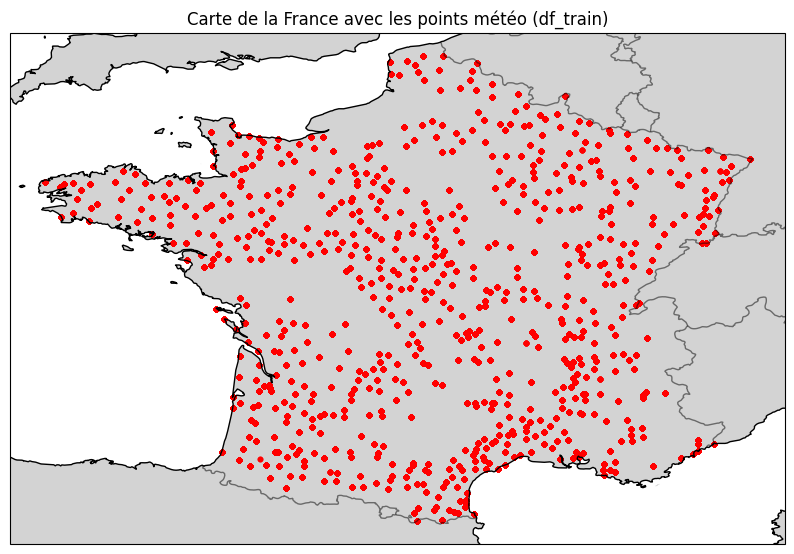

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Tracer la carte avec Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter les frontières, côtes, et terres
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)  # Frontières
ax.add_feature(cfeature.COASTLINE)  # Côtes
ax.add_feature(cfeature.LAND, facecolor='lightgrey')  # Terre

# Ajouter les points météo depuis df_train
ax.scatter(
    gdf['correct_longitude'], 
    gdf['correct_latitude'], 
    color='red', 
    s=10,
    transform=ccrs.PlateCarree()
)

# Définir les limites de la carte (centrée sur la France)
#ax.set_extent([-5, 10, 41, 51], crs=ccrs.PlateCarree())  # limites adaptées à la France

# Ajouter un titre
plt.title("Carte avec les points météo")
plt.show()

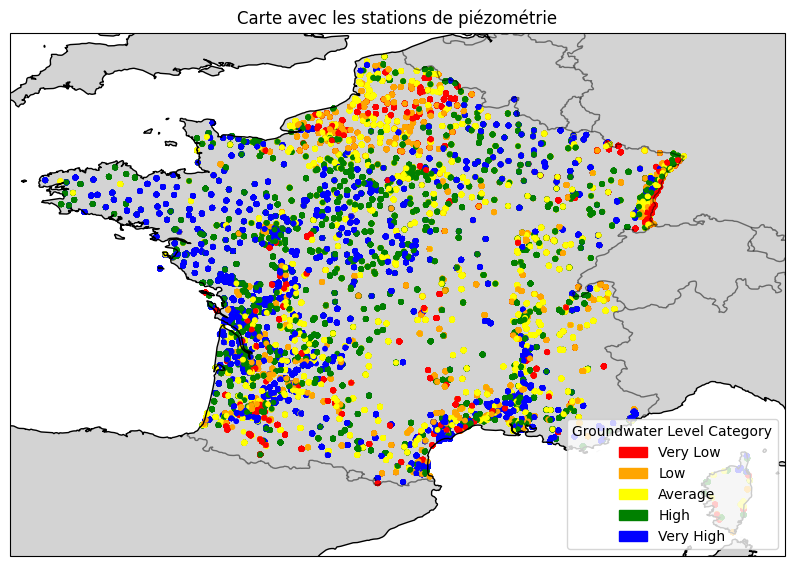

In [48]:
import matplotlib.patches as mpatches

# Créer une nouvelle colonne de géométrie pour les stations
geometry_station = [Point(xy) for xy in zip(df_train['piezo_station_longitude'], df_train['piezo_station_latitude'])]
gdf_station = gpd.GeoDataFrame(df_train, geometry=geometry_station, crs="EPSG:4326")

# Définir une fonction de mapping des couleurs
def map_category_to_color(category):
    color_mapping = {
        'Very Low': 'red',
        'Low': 'orange',
        'Average': 'yellow',
        'High': 'green',
        'Very High': 'blue'
    }
    return color_mapping.get(category, 'gray')  # couleur par défaut : gris

# Appliquer le mapping pour ajouter une colonne de couleurs
gdf_station['color'] = gdf_station['piezo_groundwater_level_category'].map(map_category_to_color)

# Tracer la carte avec Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter les frontières, côtes, et terres
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightgrey')

# Ajouter les stations avec couleurs spécifiques
scatter = ax.scatter(
    gdf_station['piezo_station_longitude'], 
    gdf_station['piezo_station_latitude'], 
    color=gdf_station['color'], 
    s=10,
    transform=ccrs.PlateCarree()
)

# Ajouter une légende pour les catégories
legend_labels = {
    'Very Low': 'red',
    'Low': 'orange',
    'Average': 'yellow',
    'High': 'green',
    'Very High': 'blue'
}
handles = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
ax.legend(handles=handles, title="Groundwater Level Category", loc='lower right')

# Définir les limites de la carte (centrée sur la France)
#ax.set_extent([-5, 10, 41, 51], crs=ccrs.PlateCarree())  # Limites adaptées à la France

# Ajouter un titre
plt.title("Carte avec les stations de piézométrie")
plt.show()

In [ ]:
from datetime import datetime
import seaborn as sns
import os
from matplotlib.colors import ListedColormap
from PIL import Image

# Charger les données
df_train = pd.read_csv('X_train_Hi5.csv', nrows=100000)

# Convertir les dates en format datetime
df_train['piezo_measurement_date'] = pd.to_datetime(df_train['piezo_measurement_date'], errors='coerce')

In [50]:
# Créer une géométrie pour GeoDataFrame
geometry_station = [Point(xy) for xy in zip(df_train['piezo_station_longitude'], df_train['piezo_station_latitude'])]

gdf_station = gpd.GeoDataFrame(df_train, geometry=geometry_station, crs="EPSG:4326")

# Mapper les catégories en niveaux numériques pour la heatmap
category_to_numeric = {
    'Very Low': 1,
    'Low': 2,
    'Average': 3,
    'High': 4,
    'Very High': 5
}
gdf_station['level_numeric'] = gdf_station['piezo_groundwater_level_category'].map(category_to_numeric)

# Créer un répertoire pour les images temporaires
os.makedirs('frames', exist_ok=True)


In [ ]:
# Créer des heatmaps pour chaque jour unique
unique_dates = gdf_station['piezo_measurement_date'].dt.date.unique()
for date in unique_dates:
    daily_data = gdf_station[gdf_station['piezo_measurement_date'].dt.date == date]

    # Configurer la figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, facecolor='lightgrey')

    # Heatmap
    if not daily_data.empty:
        sns.kdeplot(
            x=daily_data['piezo_station_longitude'],
            y=daily_data['piezo_station_latitude'],
            weights=daily_data['level_numeric'],
            cmap=ListedColormap(['red', 'orange', 'yellow', 'green', 'blue']),
            fill=True,
            alpha=0.6,
            bw_adjust=0.5,
            ax=ax
        )

    ax.set_title(f"Heatmap des niveaux d'eau souterraine - {date}", fontsize=14)

    # Sauvegarder l'image
    plt.savefig(f'frames/frame_{date}.png')
    plt.close()

In [54]:
# Créer le GIF
frames = []
for date in sorted(unique_dates):
    frame_path = f'frames/frame_{date}.png'
    frames.append(Image.open(frame_path))

# Sauvegarder le GIF
frames[0].save(
    'groundwater_heatmap.gif',
    save_all=True,
    append_images=frames[1:],
    duration=300,
    loop=0
)

# Nettoyage des fichiers temporaires
import shutil
shutil.rmtree('frames')

print("GIF créé : 'groundwater_heatmap.gif'")

GIF créé : 'groundwater_heatmap.gif'
